In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [47]:
from sklearn.cluster import KMeans

In [3]:
data = pd.read_csv(r'C:\Users\Dylan\Desktop\ML\countries.csv')

In [4]:
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


In [12]:
data_m = data.copy()
data_m['MAP'] = data_m['Language'].map({'English': 0, 'French':1, 'German':2})

In [13]:
print(data_m)

     Country  Latitude  Longitude Language  MAP
0        USA     44.97    -103.77  English    0
1     Canada     62.40     -96.80  English    0
2     France     46.75       2.40   French    1
3         UK     54.01      -2.53  English    0
4    Germany     51.15      10.40   German    2
5  Australia    -25.45     133.11  English    0


In [35]:
data_m = data_m.drop(['Language'], axis=1)
x = data_m.iloc[:,1:4]

In [37]:
x

,Latitude,Longitude,MAP
0,44.97,-103.77,0
1,62.40,-96.80,0
2,46.75,2.40,1
3,54.01,-2.53,0
4,51.15,10.40,2
5,-25.45,133.11,0


In [38]:
kmeans = KMeans(3)

In [39]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [40]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 0, 2, 2, 2, 1])

In [41]:
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,0
2,France,46.75,2.40,French,2
3,UK,54.01,-2.53,English,2
4,Germany,51.15,10.40,German,2
5,Australia,-25.45,133.11,English,1


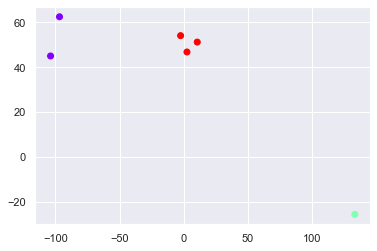

In [42]:
plt.scatter(data['Longitude'],data['Latitude'], c=data_with_clusters['Cluster'], cmap ='rainbow')

In [49]:
kmeans.inertia_

290.10523333333333

In [52]:
wcss = []
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

In [53]:
wcss

[42605.41356666667,
 13208.95812,
 290.10523333333333,
 113.91233333333332,
 39.00624999999998,
 0.0]

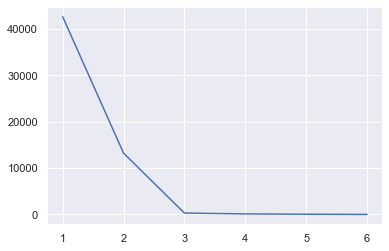

In [54]:
clusters = range(1,7)
plt.plot(clusters, wcss)

In [55]:
# ELBOW !!! pick 3